In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib
import os

In [44]:
DATA_PATH = os.path.join("datasets", "titanic")
train_data = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
test_data = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))

In [45]:
train_data = train_data.drop('Name', axis=1).drop('Ticket', axis=1).drop('PassengerId', axis=1)


In [46]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [47]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
train_set = train_data.drop('Survived', axis=1)
train_labels = train_data['Survived'].copy()

array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

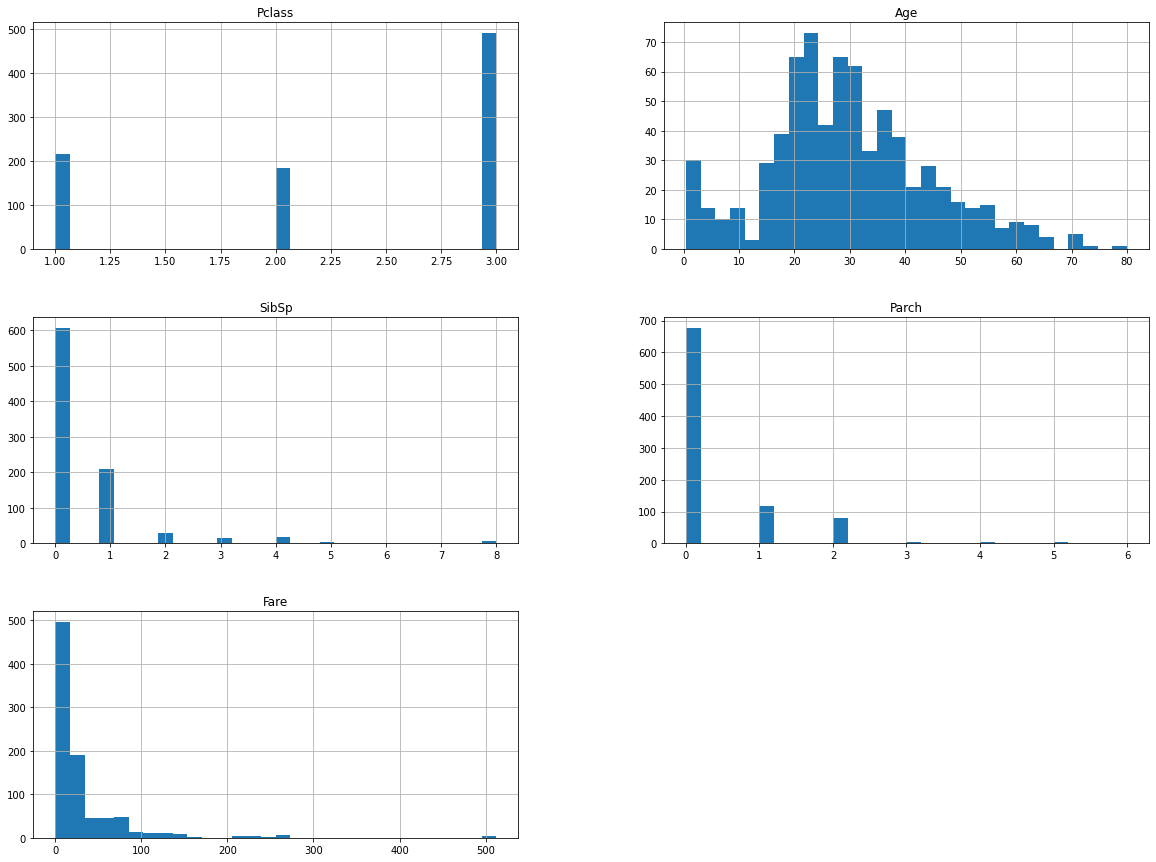

In [51]:
train_set.hist(bins=30, figsize=(20,15))

In [55]:
train_set

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [68]:
train_num_attrs = train_set.copy()\
.drop('Sex', axis=1).drop('SibSp', axis=1).drop('Parch', axis=1)\
.drop('Cabin', axis=1).drop('Embarked', axis=1).drop('Pclass', axis=1)
train_num_attrs

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [74]:
train_cat_attrs = train_set.copy().drop('Fare', axis=1).drop('Age', axis=1)
train_cat_attrs

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,3,male,1,0,NaN,S
1,1,female,1,0,C85,C
2,3,female,0,0,NaN,S
3,1,female,1,0,C123,S
4,3,male,0,0,NaN,S
...,...,...,...,...,...,...
886,2,male,0,0,NaN,S
887,1,female,0,0,B42,S
888,3,female,1,2,NaN,S
889,1,male,0,0,C148,C


In [80]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

train_num_prep = num_pipeline.fit_transform(train_num_attrs)

In [83]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='f')),
    ('encoder', OneHotEncoder()),
])

train_cat_prep = cat_pipeline.fit_transform(train_cat_attrs)

In [89]:
train_cat_prep.toarray()[0]

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0.])

In [99]:
num_attribs = list(train_num_attrs)
cat_attribs = list(train_cat_attrs)
print(cat_attribs)
print(num_attribs)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

train_prep = full_pipeline.fit_transform(train_set)
#train_prep.toarray()[1] #verify data shape

['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']
['Age', 'Fare']


In [100]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(train_prep, train_labels)

SVC()

In [103]:
some_data = train_set.iloc[:10]
some_labels = train_labels.iloc[:10]
some_data_prep = full_pipeline.transform(some_data)
print('predictions:',svm_clf.predict(some_data_prep))
print('labels:', list(some_labels))
#looks good

predictions: [0 1 1 1 0 0 0 0 0 1]
labels: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


In [110]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cv_accuracy = cross_val_score(svm_clf, train_prep, train_labels, cv=5, scoring='accuracy')

In [111]:
cv_accuracy

array([0.83798883, 0.81460674, 0.81460674, 0.79775281, 0.84831461])